# Magma Simulator

In [1]:
import os
os.environ['MANTLE'] = 'lattice'
from mantle import DefineCounter

counter = DefineCounter(2)

import mantle lattice ice40
import mantle lattice mantle40


In [2]:
from magma.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(counter)
scope = Scope()
O0 = []
O1 = []
COUT = []
for i in range(16):
    for j in range(2):
        simulator.step()
        simulator.evaluate()
        O = simulator.get_value(counter.O, scope)
        O0.append(O[0])
        O1.append(O[1])
        COUT.append(simulator.get_value(counter.COUT, scope))

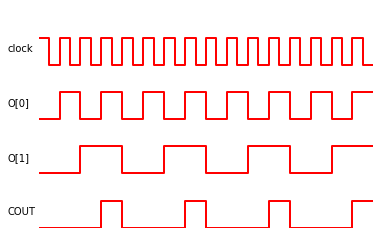

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n = len(O1)//2
t = np.repeat(0.5*np.arange(2*n+1),2)[1:-1]
clock = np.tile(np.array([1,1,0,0]),n)

O0 = np.repeat(np.array(O0),2)
O1 = np.repeat(np.array(O1),2)
COUT = np.repeat(np.array(COUT),2)


plt.text(-1.5, 3.25, 'clock')
plt.plot(t, 0.5*clock+3, 'r', linewidth = 2)
plt.text(-1.5, 2.25, 'O[0]')
plt.plot(t, 0.5*O0+2,    'r', linewidth = 2)
plt.text(-1.5, 1.25, 'O[1]')
plt.plot(t, 0.5*O1+1,    'r', linewidth = 2)
plt.text(-1.5, 0.25, 'COUT')
plt.plot(t, 0.5*COUT,    'r', linewidth = 2)
plt.xlim([0,n])
plt.ylim([0,4])

plt.gca().axis('off')
plt.show()